# Flight Price Prediction

## Importing Libreries

In [1]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset
As according to question statement there are two datasets available in problem statement and they are: 1.train 2.test.
So, first import train data set and than import test dataset.

### 1. Train Dataset
Importing train data set as a df1

In [3]:
#Import the dataset

df1= pd.read_excel(r"C:\Users\Chaitali Nakade\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001 (3)\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns of df1(train)

In [4]:
df1.shape

(10683, 11)

There are 10683 Rows and 11 Columns in train dataset

## Detailed description df1

In [5]:
df1.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns in df1

In [6]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Some columns are having object datatypes :Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info.

and rest is integer data type : Price, 

Price is a target variable.

## Checking is there any null value in train dataset df1

In [7]:
#check is there any null value present in any column

df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are one column is having missing data in it.
1. Total_Stops        1

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

In [14]:
df1['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

#### 1. Distplot

In [489]:
fe = df1[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]]

ValueError: could not convert string to float: 'IndiGo'

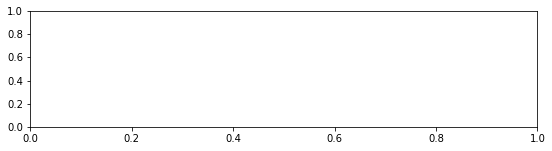

In [9]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in df1:
    if plotnumber <= 15: # as we see there are eight columns in the data
        ax = plt.subplot(8,2,plotnumber)
        sn.distplot(df1[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight, Item_MRP and Item_Visibility is having skewness in it. 

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it and Item_Outlet_Sales is a target variable.

#### 2. Boxplot

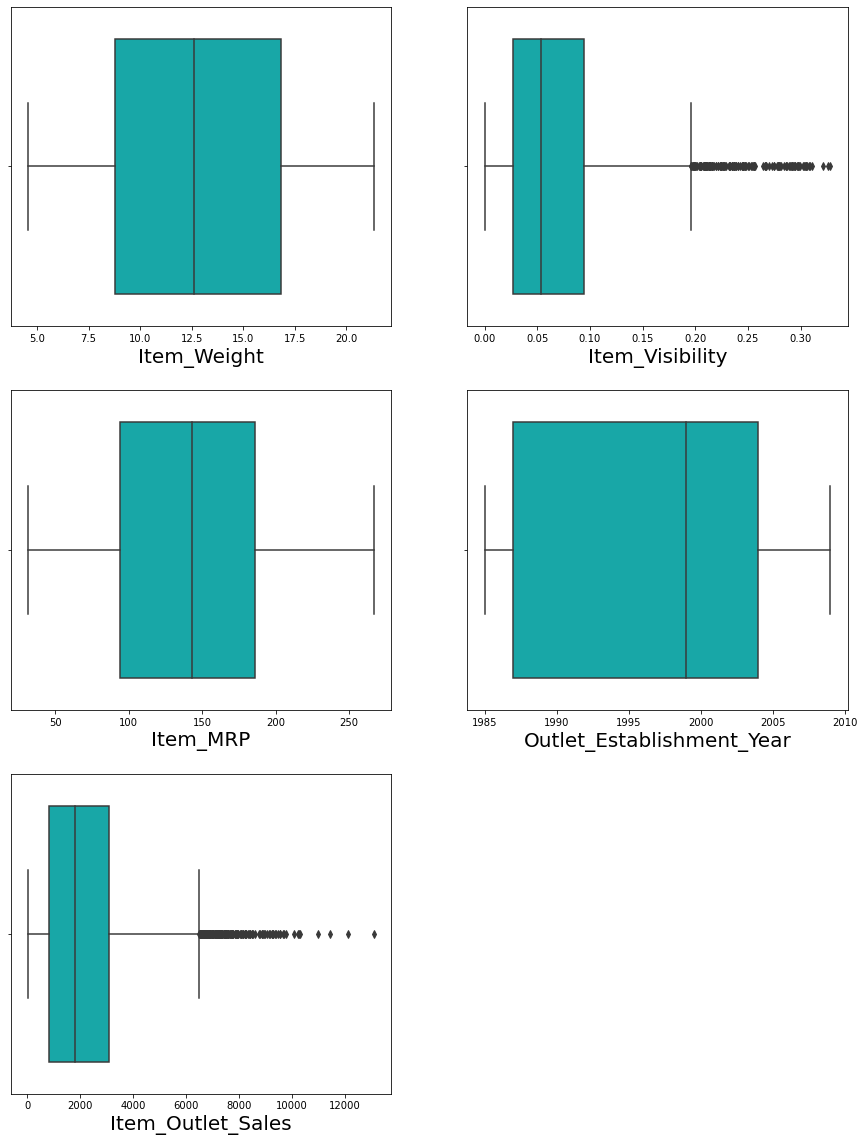

In [491]:
#Relationship Visualizing

plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

##### As we have seen in boxplot Item_Visibility is having outliers in it.

##### 3. Histplot

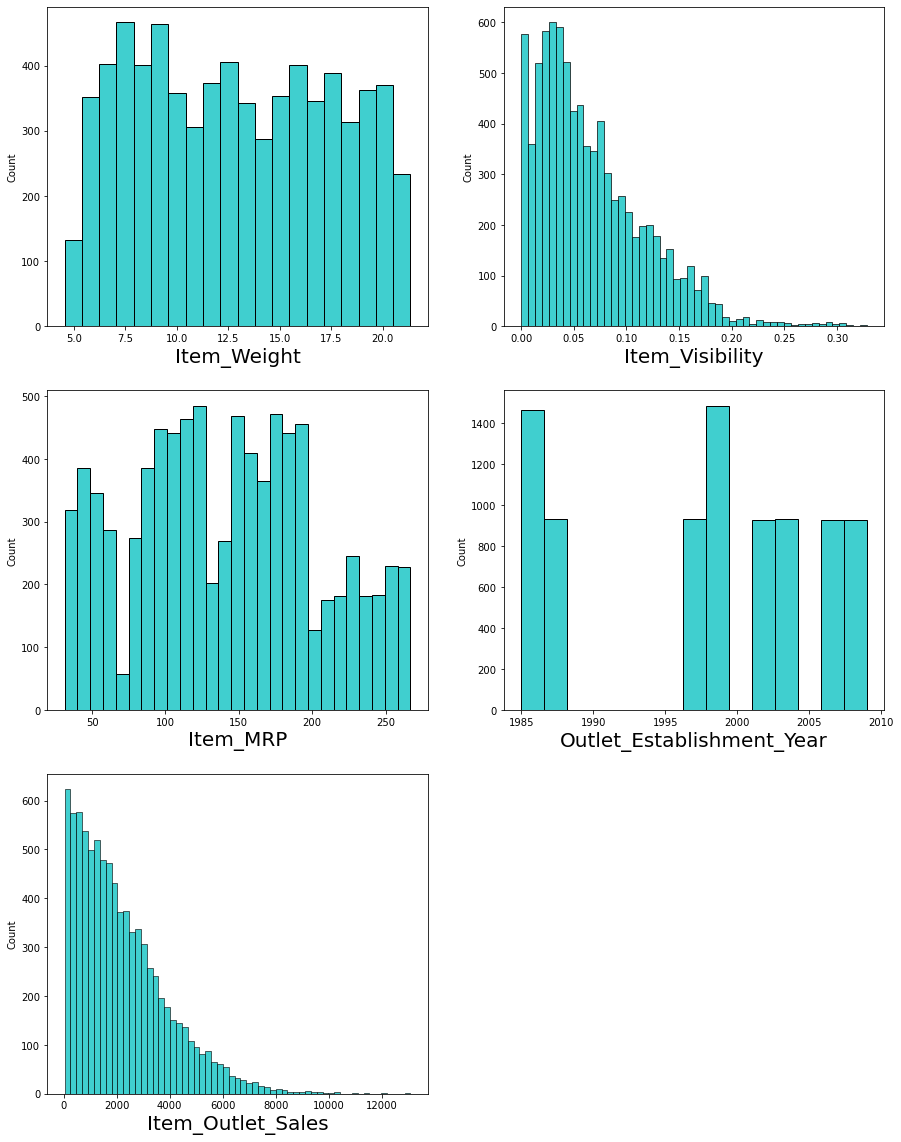

In [492]:
#Relationship Visualizing

plt.figure(figsize = (15,20), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.histplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

## Bi variate analysis
Bi variate analysis is works with two variables.

In [493]:
df_bi=df1.drop(['Outlet_Location_Type'], axis=1)
df_bi=df1.drop(['Outlet_Type'], axis=1)
df_bi=df1.drop(['Outlet_Size'], axis=1)

It is not possible inscatter plot to every variable relationship with target variable as it is not in proper form, so drop that column only for bivariate visualization.

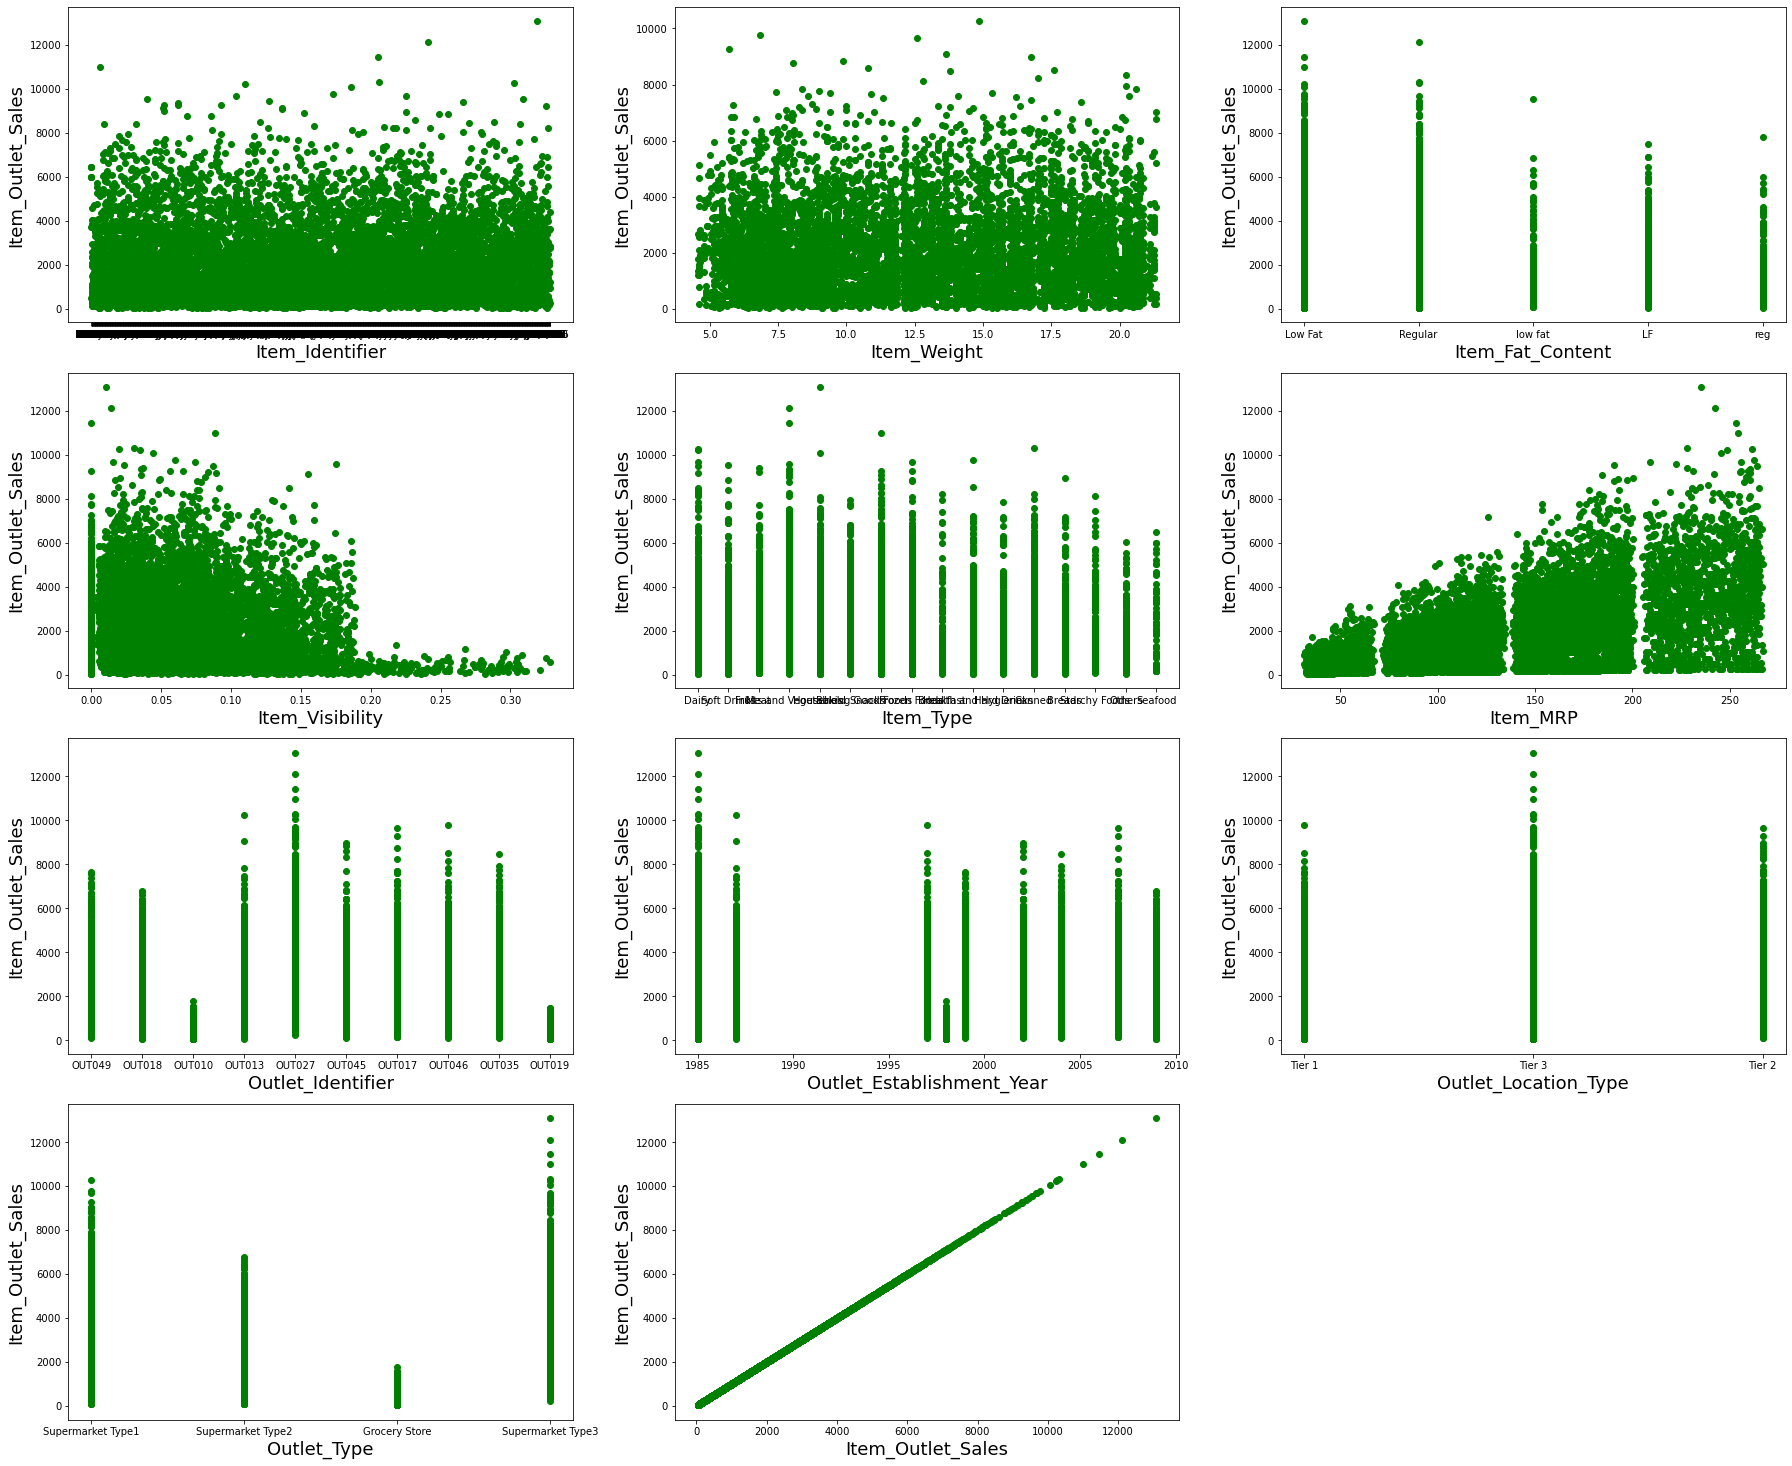

In [494]:
#Relationship Visualizing

plt.figure(figsize = (25,25), facecolor = 'white')
plotnumber = 1

for column in df_bi:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(df_bi[column],df_bi['Item_Outlet_Sales'], color='g')
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Item_Outlet_Sales', fontsize=18)
    plotnumber += 1
plt.tight_layout()

as we have seen in plot Item_MRP and Item_Outlet_Sales is having almost linear relationship with target variable and other variables are having non linear realationship with target variable and outliers are also present in some columns.

# Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

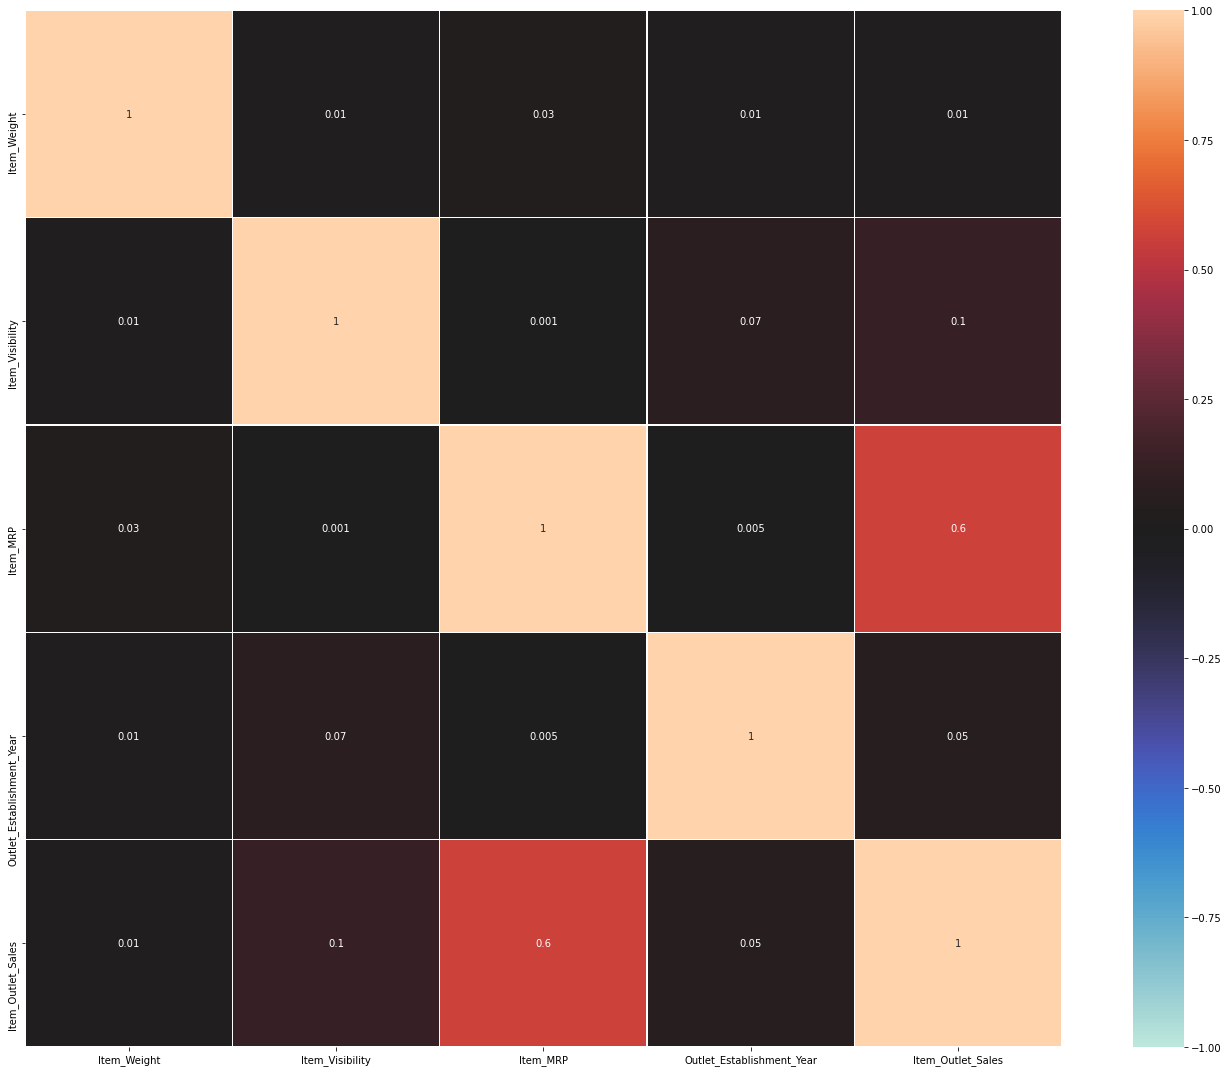

In [495]:
df1_cor = df1.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df1_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap Item_Outlet_Sales and Item_MRP are strongly correlated with each other and Item_weight column is weekly correlate with targate variable.

##### Find out which columns are positively and negatively correlated with each other

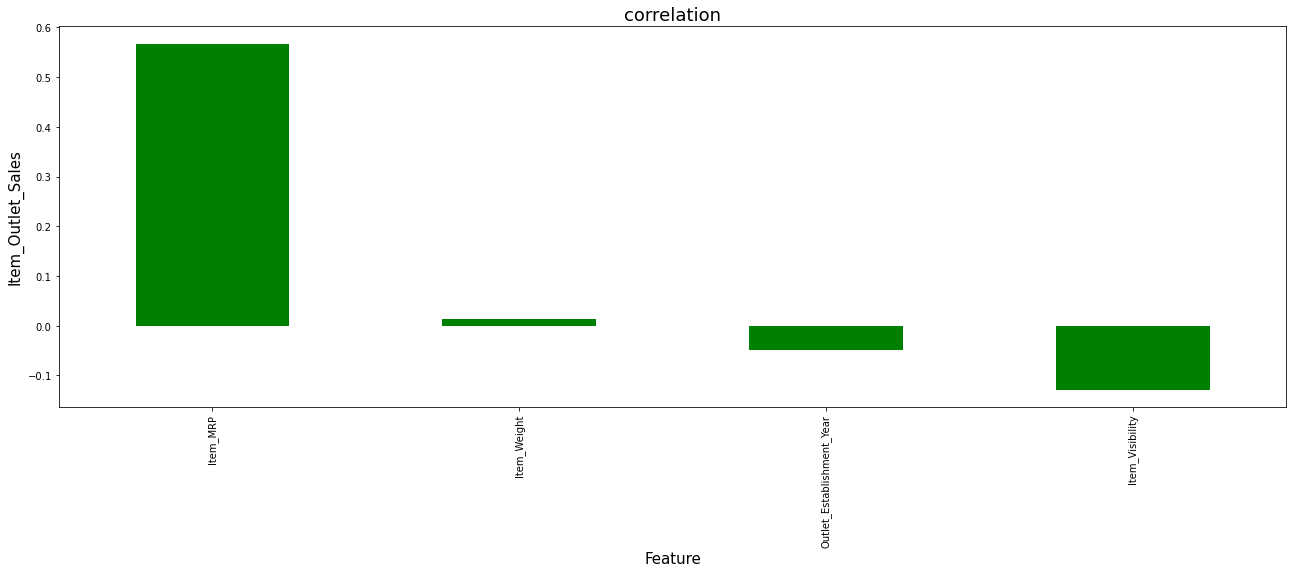

In [496]:
plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

Item_weight column is weekly correlate with targate variable.

##### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

In [497]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Encoding
#### 1.Drop input variable 'Item_Identifier'

In [498]:
df1['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [499]:
df1['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRN47     9
NCF42     9
FDW26     9
         ..
FDE52     1
FDY43     1
DRF48     1
FDN52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [500]:
#drop Item_Identifier colum
df1=df1.drop(['Item_Identifier'], axis=1)

#### 2. Encode input variable Item_Fat_Content

In [501]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [502]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [503]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')

In [504]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [505]:
# Replace Item_Fat_Content column to binary encoder
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

#### 3. Encode Item type

In [506]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [507]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [508]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [509]:
df1["Item_Type"] = le.fit_transform(df1["Item_Type"])

#### 4.Outlet_Identifier

In [510]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [511]:
df1['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [512]:
#drop Outlet_Type colum as its just an identifier
df1=df1.drop(['Outlet_Identifier'], axis=1)

#### 5. Encode and treat missing values of Outlet_Size

In [513]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [514]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [515]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])

In [516]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [517]:
df1["Outlet_Size"] = le.fit_transform(df1["Outlet_Size"].values.reshape(-1,1))

In [518]:
df1['Outlet_Size'].unique()

array([1, 0, 2])

#### 6. Encode Outlet_Location_Type

In [519]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [520]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [521]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [522]:
df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])

In [523]:
df1['Outlet_Location_Type'].unique()

array([0, 2, 1])

#### 7. Encode Outlet_Type

In [524]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [525]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [526]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [527]:
df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [528]:
df1['Outlet_Type'].unique()

array([1, 2, 0, 3])

## Handle missing value

In [529]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [530]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,0,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,0,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,0,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,0,0.145221,13,103.1332,2009,1,2,2,1845.5976


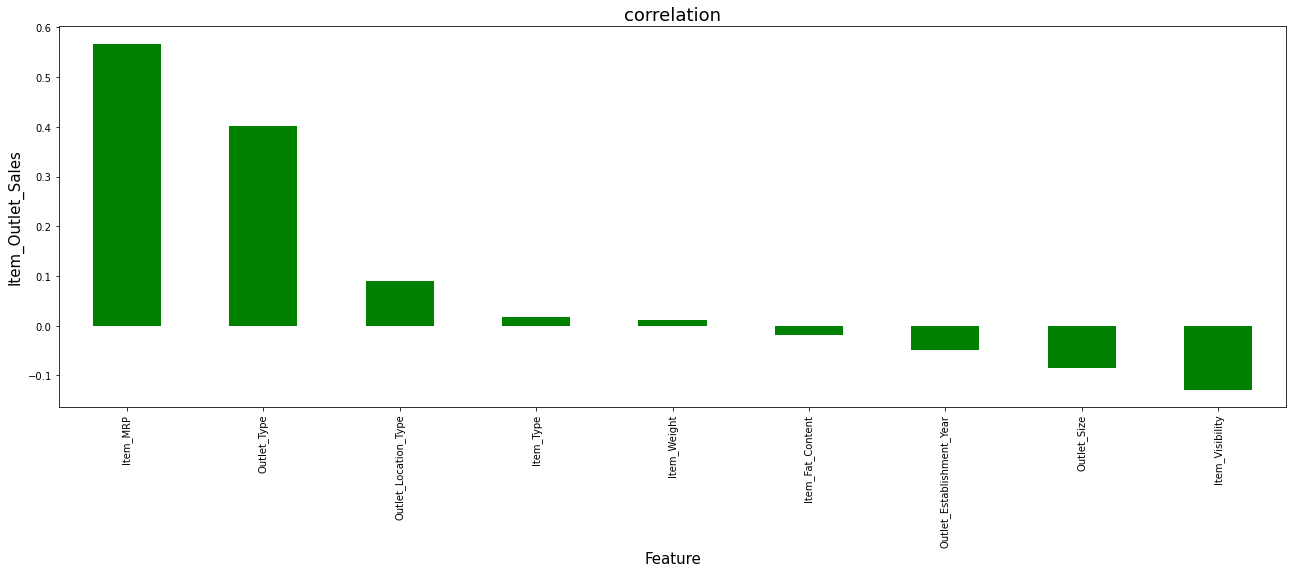

In [531]:
plt.figure(figsize=(22,7))
df1.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Item_Outlet_Sales', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

In [ ]:
df1=df1.drop(['Item_Type'], axis=1)

In [563]:
#drop Outlet_Type colum as its just an identifier

df1=df1.drop(['Item_Weight'], axis=1)
df1=df1.drop(['Item_Fat_Content'], axis=1)

# Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [564]:
df1.dtypes

Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

as shown in above only 2 columns are contineous in nature and we need to remove outlier or skewness of contineous data.

## 1.Outlier removal using Zscore

In [568]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df1[['Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df1 = df1[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df1.shape)
print("shape after".ljust(20),":", new_df1.shape)
print("Percentage Loss".ljust(20),":", (df1.shape[0]-new_df1.shape[0])/df1.shape[0])

shape before and after
shape before         : (8523, 7)
shape after          : (8428, 7)
Percentage Loss      : 0.011146309984747155


In [569]:
((8523-8428)/8523)*100

1.1146309984747156

1.114% data loss after using Zscore technique

98.88% data remains.

In [570]:
new_df1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.00000,8428.000000
mean,0.063905,140.996015,1997.911723,1.166469,1.115449,1.21476,2202.021401
std,0.047302,62.287713,8.356697,0.599973,0.810126,0.79060,1704.631341
min,0.000000,31.290000,1985.000000,0.000000,0.000000,0.00000,33.290000
25%,0.026861,93.802150,1987.000000,1.000000,0.000000,1.00000,862.876800
50%,0.053293,142.915400,1999.000000,1.000000,1.000000,1.00000,1816.968200
75%,0.093160,185.708200,2004.000000,2.000000,2.000000,1.00000,3115.944000
max,0.220226,266.888400,2009.000000,2.000000,2.000000,3.00000,13086.964800


## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

#### Visualize data again to check outliers are present at low side or high side 

In [571]:
data2 = df1

In [595]:
#features in which outliers are detected
fe = data2[[,'Item_Visibility','Item_MRP']]

SyntaxError: invalid syntax (<ipython-input-595-62713f07fa4a>, line 2)

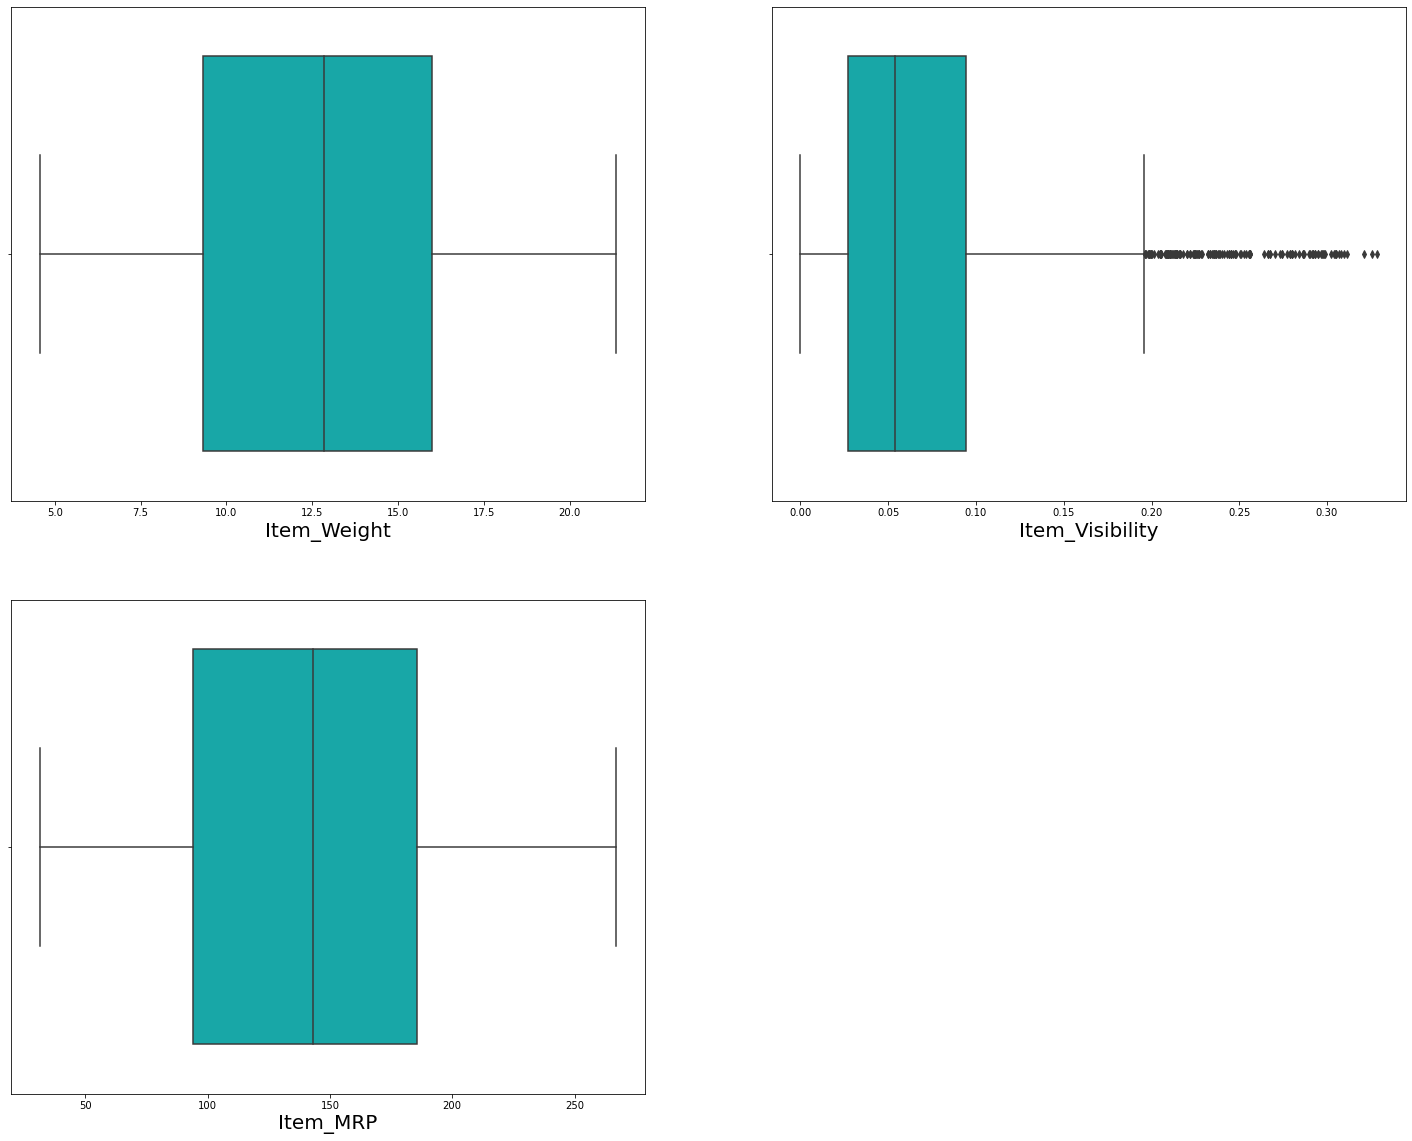

In [596]:
plt.figure(figsize=(25,20))
graph = 1

for column in fe:
    if graph <= 30:
        ax = plt.subplot(2,2, graph)
        sn.boxplot(fe[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

In [597]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [598]:
data2.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000
mean,0.063061,140.968471,1997.948443,1.164578,1.116004,1.221864,2212.891704
std,0.046130,62.272255,8.352477,0.599997,0.808853,0.787416,1703.559375
min,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,0.026789,93.794900,1987.000000,1.000000,0.000000,1.000000,874.861200
50%,0.052729,142.915400,1999.000000,1.000000,1.000000,1.000000,1830.950000
75%,0.092277,185.625300,2004.000000,2.000000,2.000000,1.000000,3124.599400
max,0.195721,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


## Outlier detection formula 

#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR) 

##### Outliers removal from higher side 

In [599]:
#as shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visi_out = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visi_out

0.190508941

In [600]:
index_out = np.where(data2['Item_Visibility'] > visi_out)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,249.8092,1999,1,0,1,3735.1380
1,1,0.019278,48.2692,2009,1,2,2,443.4228
2,2,0.016760,141.6180,1999,1,0,1,2097.2700
3,3,0.000000,182.0950,1998,1,2,0,732.3800
4,4,0.000000,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8359,8518,0.056783,214.5218,1987,0,2,1,2778.3834
8360,8519,0.046982,108.1570,2002,1,1,1,549.2850
8361,8520,0.035186,85.1224,2004,2,1,1,1193.1136
8362,8521,0.145221,103.1332,2009,1,2,2,1845.5976


after removing outliers from Item_Visibility 8379 rows will remains in dataframe. 

In [602]:
((8523-8364)/8523)*100

1.8655403027103132

1.86% data loss after using IQR technique

98.31% data remains after using IQR technique.

#### After removing outliers using IQR technique there are 8379 rows will remains in dataset.

### After applying Zscore and IQR technique to remove outliers. We conclude that same amount data will loss in Zscore technique and IQR yechnique . so we will any of tham

## Check the skewness and remove that

In [603]:
new_df1.skew()

Item_Visibility              0.882121
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Outlet_Size                 -0.082879
Outlet_Location_Type        -0.213304
Outlet_Type                  0.947057
Item_Outlet_Sales            1.173070
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column have skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness from that.

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [604]:
new_df1.dtypes

Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## Apply Power transformation to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [605]:
#applying log transformation on skewed columns

new_df1['Item_Visibility'] = new_df1['Item_Visibility'].replace(0,new_df1['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

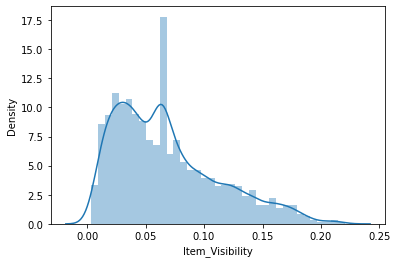

In [606]:
sn.distplot(new_df1['Item_Visibility'])

#### As shown in plot less skewness present after using power transformation skewness removal technique.

# Now work on data set 2

## 2. Test Dataset

In [549]:
#Importing train data set as a df1

#Import the dataset

df2= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Shape of data with number of rows and columns of df2(test)

In [402]:
df2.shape

(5681, 11)

There are 5681 Rows and 11 Columns in test dataset

## Detailed description df2

In [403]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns in df2

In [404]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Some columns are having object datatypes :Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type.

Some columns are having floting datatype: Item_Weight, Item_Visibility, Item_MRP.

and rest is integer data type : Outlet_Establishment_Year,

## Check is there any null value in test dataset df2

In [405]:
#check is there any null value present in any column

df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are two columns are having missing data in it.
1. Item_Weight : 976 rows are missing
2. Outlet_Size : 1606 rows are missing

## EDA (Exploratory Data Analysis)
### Visualization (Uni Variate analysis)¶
##### Uni variate analysis works with only one variable, hence it is called uni variate.

##### 1. Distplot

In [406]:
feature = df2[["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year"]]

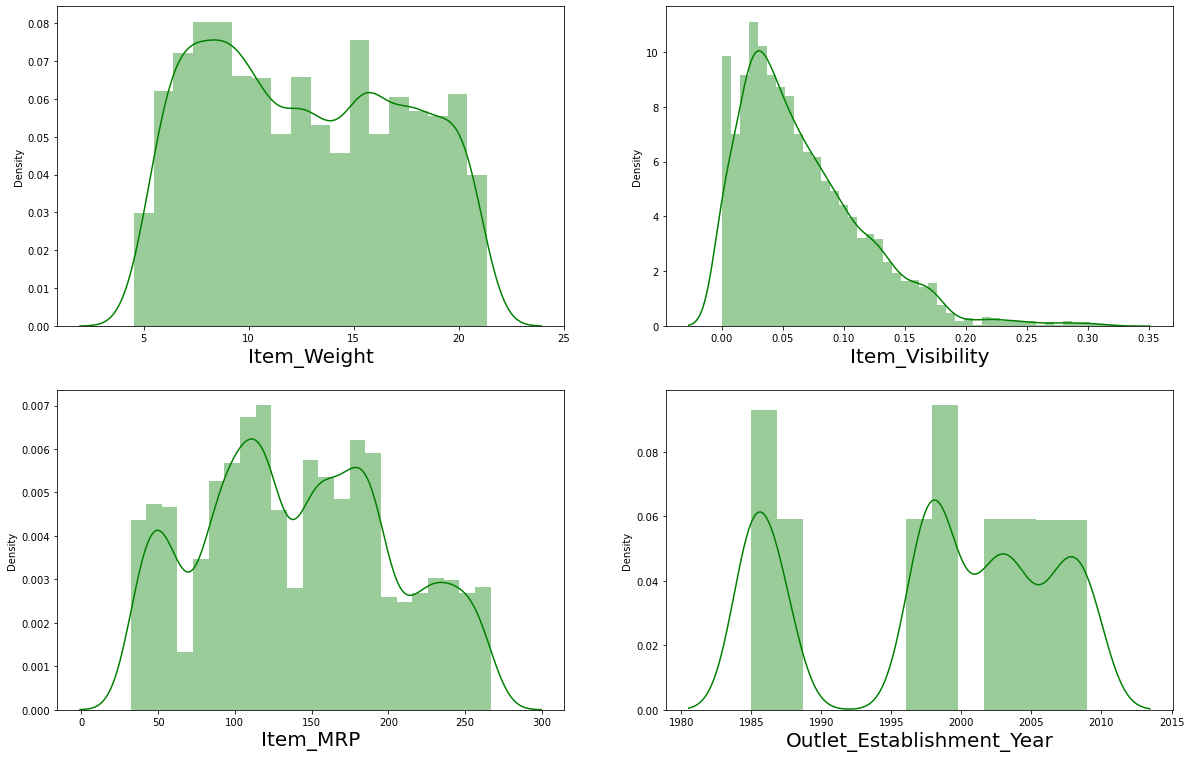

In [407]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.distplot(feature[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

As shown in distplot, there are some variabls are almost normally distributed like, Item_Weight, Item_MRP and Item_Visibility is having skewness in it.

Outlet_Establishment_Year is a catogorical variable so need to find skewness in it.

#### 2. Boxplot

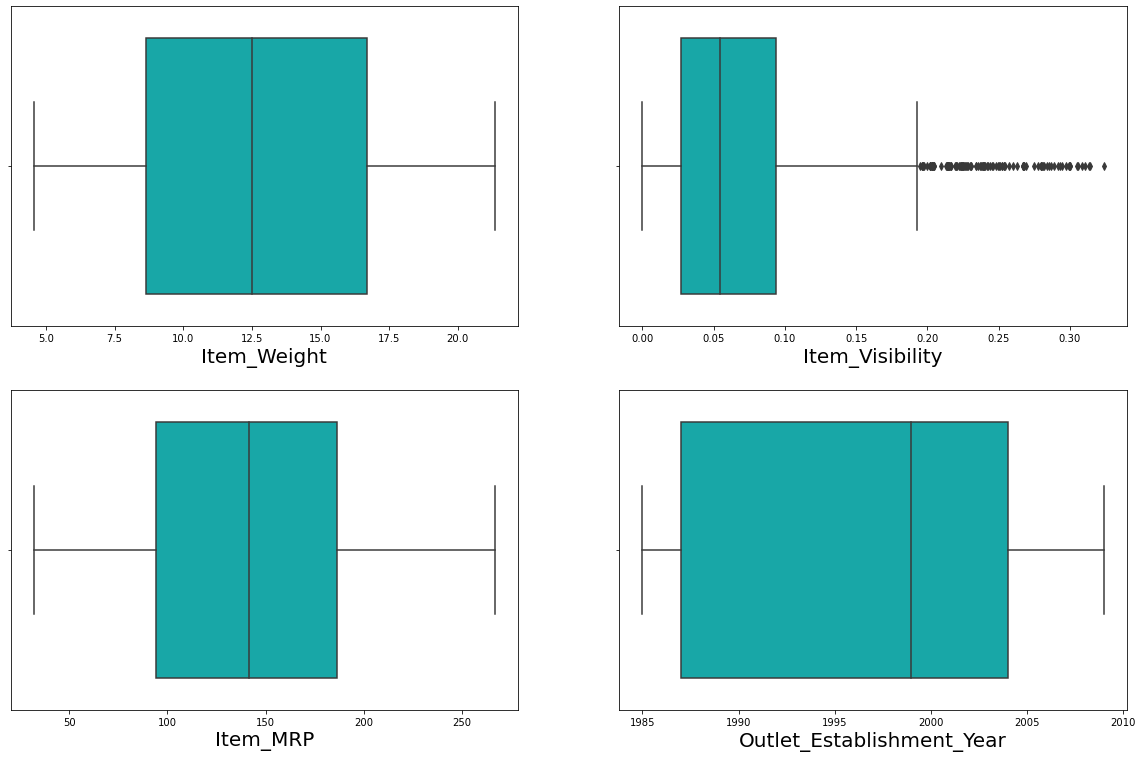

In [408]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 6: # as we see there are eight columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sn.boxplot(feature[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

##### As we have seen in boxplot Item_Visibility is having outliers in it.

#### 3. Histplot

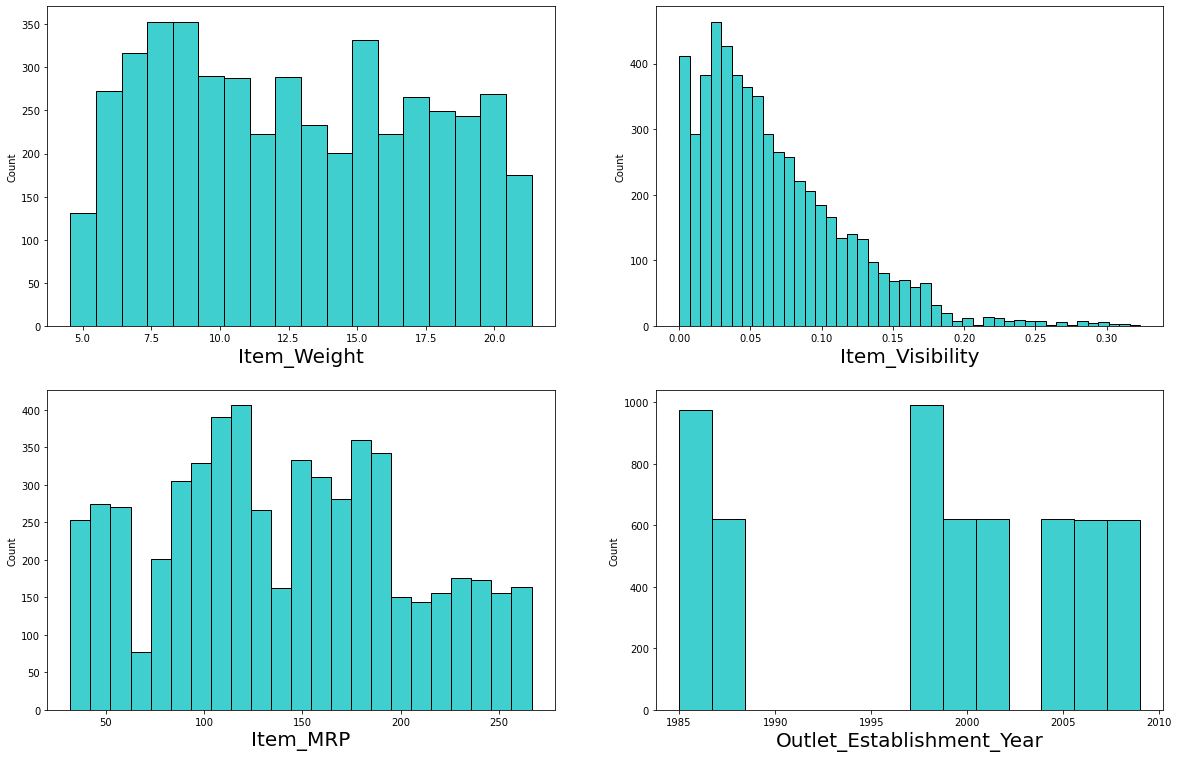

In [409]:
#Relationship Visualizing

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 6: 
        ax = plt.subplot(3,2,plotnumber)
        sn.histplot(feature[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

## Multi Variate analysis
##### Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

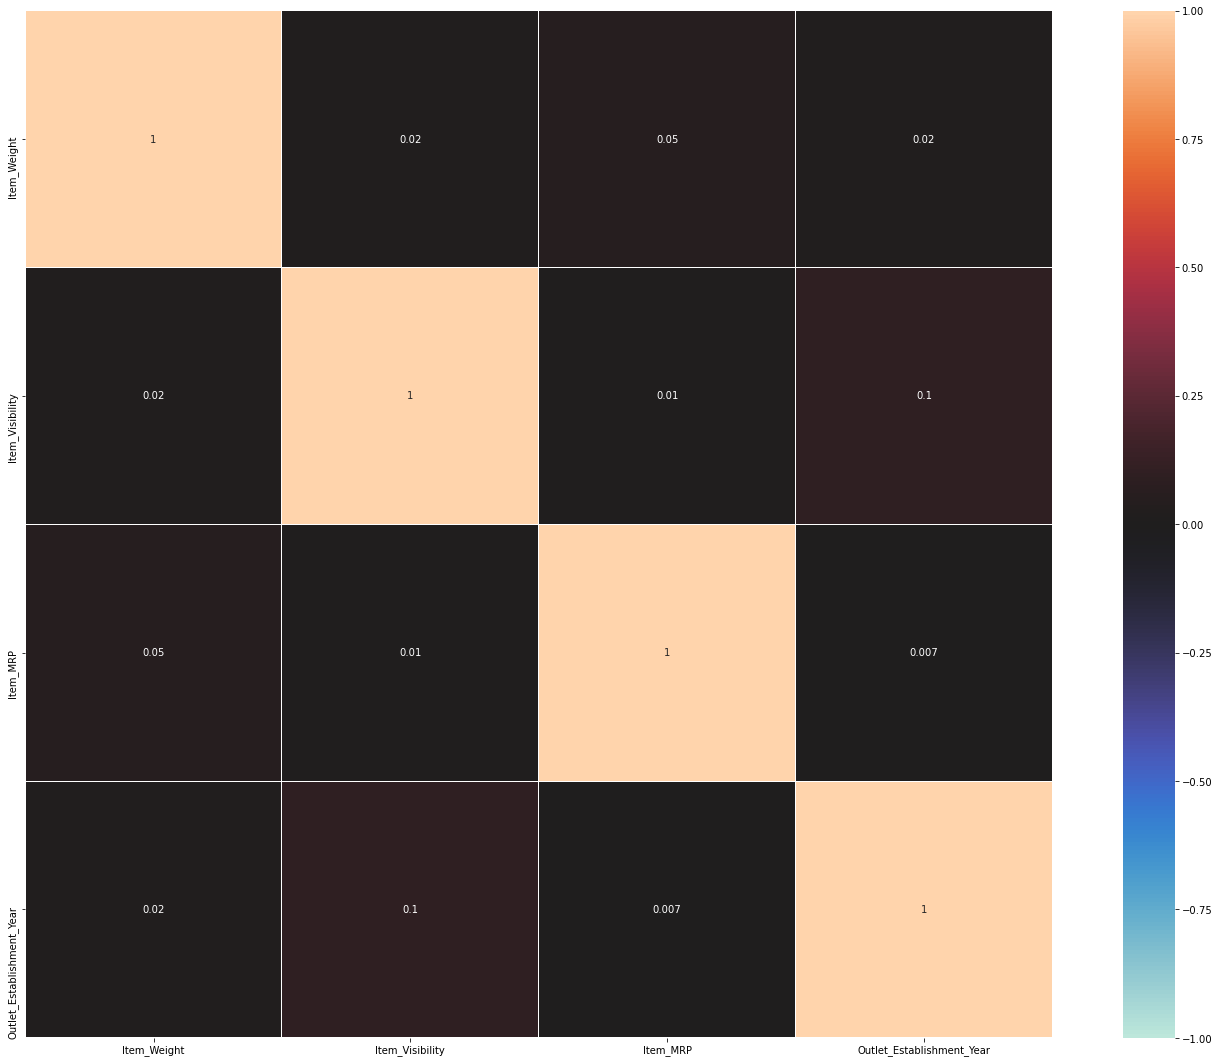

In [410]:
df2_cor = df2.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df2_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

As shown in heatmap Item_Visibility and Outlet_Establishment_Year are strongly correlated with each other and Outlet_Establishment_Year column is weekly correlate with Item_MRP.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed for next steps:

In [411]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Encoding, Droping and Missing data handling
#### 1.Drop input variable 'Item_Identifier'

In [412]:
df2['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

In [413]:
df2['Item_Identifier'].value_counts()

FDQ60    8
FDZ50    8
FDP15    8
NCS41    8
DRF48    8
        ..
NCA06    1
FDY55    1
FDW49    1
FDV38    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

As we have seen the Item_Identifier unique values, so we can drop this column.

In [414]:
#drop Item_Identifier colum
df2=df2.drop(['Item_Identifier'], axis=1)

#### 2. Encode input variable Item_Fat_Content

In [415]:
df2['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [416]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

As we have seen in above Item_Fat_Content values LF and low fat and Low Fat is nothing but similer values.

and reg is nothing but Regular. So, we can club that and make 2 unique values in Item_Fat_Content column.

In [417]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('LF', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('low fat', 'Low Fat')
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace('reg', 'Regular')

In [418]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [419]:
# Replace Item_Fat_Content column to binary encoder
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'Low Fat':1, 'Regular':0})

#### 3. Encode Item type

In [420]:
df2['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [421]:
df2['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [422]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [423]:
df2["Item_Type"] = le.fit_transform(df2["Item_Type"])

#### 4.Outlet_Identifier

In [424]:
df2['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [425]:
df2['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT049    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [426]:
#drop Outlet_Type colum as its just an identifier
df2=df2.drop(['Outlet_Identifier'], axis=1)

It is just an identity column so we can drop that column.

#### 5. Encode and treat missing values of Outlet_Size

In [427]:
df2['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [428]:
df2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [429]:
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

In [430]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [431]:
df2["Outlet_Size"] = le.fit_transform(df2["Outlet_Size"].values.reshape(-1,1))

In [432]:
df2['Outlet_Size'].unique()

array([1, 2, 0])

#### 6. Encode Outlet_Location_Type

In [433]:
df2['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [434]:
df2['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [435]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [436]:
df2["Outlet_Location_Type"] = le.fit_transform(df2["Outlet_Location_Type"])

In [437]:
df2['Outlet_Location_Type'].unique()

array([0, 1, 2])

#### 7. Encode Outlet_Type

In [438]:
df2['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [439]:
df2['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [440]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [441]:
df2["Outlet_Type"] = le.fit_transform(df2["Outlet_Type"])

In [442]:
df2['Outlet_Type'].unique()

array([1, 0, 3, 2])

## Handle missing value

In [443]:
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [444]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,0,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,0,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,0,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,0,0.000000,3,214.6218,2007,1,1,1


In [607]:
#drop Outlet_Type colum as its just an identifier
df2=df2.drop(['Item_Type'], axis=1)
df2=df2.drop(['Item_Weight'], axis=1)
dfdf21=df2.drop(['Item_Fat_Content'], axis=1)

## Remove outliers
Now we found the outliers and skewness in some variables.Removing outliers first.

In [608]:
df2.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

as shown in above only 2 columns are contineous in nature and we need to remove outlier or skewness of contineous data only.

### 1.Outlier removal using Zscore¶

In [611]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy


from scipy.stats import zscore

z_score= zscore(df2[['Item_Visibility','Item_MRP']]) #all contineous column only
abs_z_score = np.abs(z_score)
        
filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df2 = df2[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df2.shape)
print("shape after".ljust(20),":", new_df2.shape)
print("Percentage Loss".ljust(20),":", (df2.shape[0]-new_df2.shape[0])/df2.shape[0])

shape before and after
shape before         : (5681, 9)
shape after          : (5600, 9)
Percentage Loss      : 0.01425805315965499


1.42% data loss after using Zscore technique.

98.58% data remains.

In [612]:
new_df2.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5600.000000,5600.000000,5600.000000
mean,0.062899,141.126934,1997.926250
std,0.045919,61.771211,8.356738
min,0.000000,31.990000,1985.000000
25%,0.026848,94.446200,1987.000000
50%,0.053348,141.531200,1999.000000
75%,0.091380,186.098350,2004.000000
max,0.216763,266.588400,2009.000000


### 2. Outlier Removing using IQR

#### from boxplot in EDA, we came to know that outliers present in following columns.

###### Visualize data again to check outliers are present at low side or high side

In [613]:
data1 = df2

In [616]:
#features in which are contineous in nature
fet = data1[['Item_Visibility','Item_MRP']]

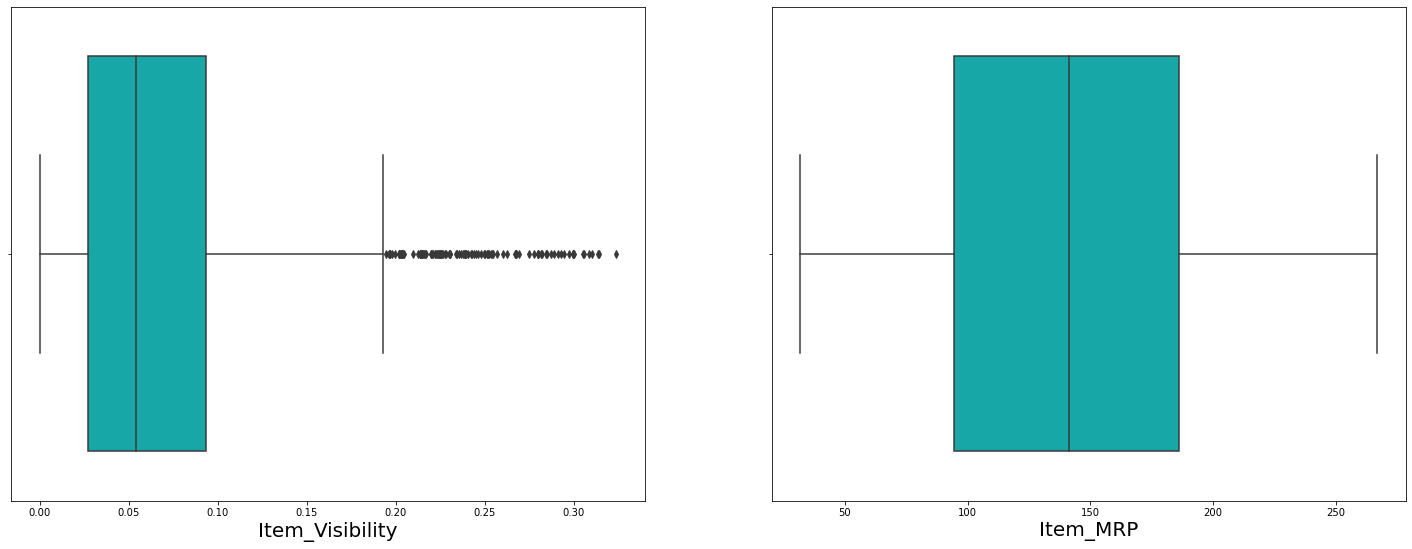

In [617]:
plt.figure(figsize=(25,20))
graph = 1

for column in fet:
    if graph <= 30:
        ax = plt.subplot(2,2, graph)
        sn.boxplot(fet[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
        
    graph+=1
plt.show()

only Item_visibility contains outliers in contineous data.

In [618]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data1.quantile(0.25)

#3rd quantile 75%
q3 = data1.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [619]:
data1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000
mean,0.065684,141.023273,1997.828903
std,0.051252,61.809091,8.372256
min,0.000000,31.990000,1985.000000
25%,0.027047,94.412000,1987.000000
50%,0.054154,141.415400,1999.000000
75%,0.093463,186.026600,2004.000000
max,0.323637,266.588400,2009.000000


### Outlier detection formula
#### Higher side ==> Q3 + (1.5 * IQR)
#### Lower side ==> Q1 - (1.5 * IQR)
##### Outliers removal from higher side¶

In [620]:
#as shown in boxplot we have outlier in higher side of Item_Visibility 
#Remove outliers from higher side so, use higher side formula

visible_out = (q3.Item_Visibility + (1.5*(iqr.Item_Visibility)))
visible_out

0.19308624500000005

In [621]:
index_out = np.where(data1['Item_Visibility'] > visible_out)
data1 = data1.drop(data1.index[index_out])
data1.shape
data1.reset_index()

,index,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,FDW58,Low Fat,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1,FDW14,reg,0.038428,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,2,NCN55,Low Fat,0.099575,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,3,FDQ58,Low Fat,0.015388,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,4,FDY38,Regular,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...
5563,5676,FDB58,Regular,0.013496,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5564,5677,FDD47,Regular,0.142991,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5565,5678,NCO17,Low Fat,0.073529,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5566,5679,FDJ26,Regular,0.000000,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


after removing outliers from Item_Visibility 5568 rows will remains in dataframe.

In [622]:
((5681-5568)/5681)*100

1.9890864284456962

1.98% data loss after using IQR technique

98.02% data remains after using IQR technique.

#### After applying Zscore and IQR technique to remove outliers. We conclude that same amount data will loss in Zscore technique and IQR yechnique . so we will any of tham

## Check the skewness and remove that

In [623]:
new_df2.skew()

Item_Visibility              0.787861
Item_MRP                     0.133061
Outlet_Establishment_Year   -0.411451
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range.

But we need to find skewness in only contineous data columns like Item_Weight, Item_Visibility and Item_MRP in which only Item_Visibility column is contineous in nature and has skewness in it. So, we need to remove skewness from Item_Visibility only.

and maximum columns contains categorical values. so no need to remove skewness contineous column.

### Check outliers datatype. If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [624]:
new_df2.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## Apply Power transformation to remove skewness
In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [625]:
#applying power transformation on skewed columns

new_df2['Item_Visibility'] = new_df2['Item_Visibility'].replace(0,new_df2['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

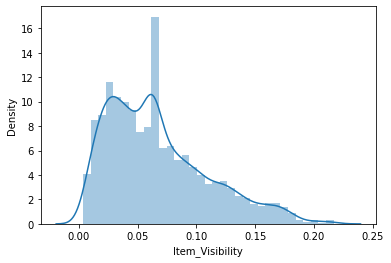

In [626]:
sn.distplot(new_df2['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

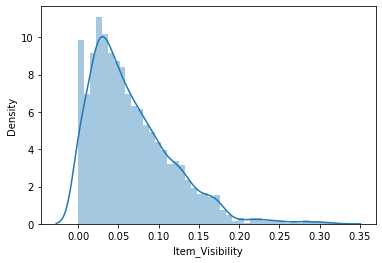

In [627]:
sn.distplot(df2['Item_Visibility'])

As shown in plot less skewness present after using power transformation skewness removal technique.compare both the plots

## Seperating the columns into featuers and target:
##### x= features, y=Target

In [628]:
x = new_df1.drop(columns = 'Item_Outlet_Sales', axis=1)
y = new_df1['Item_Outlet_Sales']
x1 = new_df2

## Scalling technique

In [629]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [630]:
x1_scalar = ss.fit_transform(x1)

ValueError: could not convert string to float: 'FDW58'

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [586]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.029176,Item_Visibility
1,1.000162,Item_MRP
2,1.071515,Outlet_Establishment_Year
3,1.702817,Outlet_Size
4,2.041415,Outlet_Location_Type
5,1.365737,Outlet_Type


In [587]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif2["Features"] = x1.columns

#lets check the values
vif2

,vif,Features
0,1.004516,Item_Weight
1,1.029566,Item_Fat_Content
2,1.027133,Item_Visibility
3,1.032014,Item_Type
4,1.005893,Item_MRP
5,1.077776,Outlet_Establishment_Year
6,1.702614,Outlet_Size
7,2.049543,Outlet_Location_Type
8,1.364586,Outlet_Type


as we have saw in the table vif value is not greater than 5. so no need to drop any column to avoid multiclinearity issue.

## Finding best random state

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [589]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.2608180685259759 on Random_state  172


In [590]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 172)

## 1.Linear Regression Model

In [591]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [592]:
pred_test=Lr.predict(x_test)

In [593]:
print(r2_score(y_test,pred_test))

0.5220867911503757


## Cross Validation of Linear Regression 

In [594]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5030693799503585

###### The Accuracy score for Linear regression model is : 47.78%
###### Cross validation score for Linear regression is : 50.31%

## Regularization

In [473]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [474]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.4778146881192237

In [ ]:
ghg

## 2.Random forest regression

In [475]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [476]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)



R2 Score:  55.09391180453116
Cross Val Score:  56.83436392636067


###### The r2 score for Random Forest Regressor model is : 54.73%
###### Cross validation score for Random Forest Regressor is : 56.80%

## Comparison of models

The diffrence between r2 score and cross validation score of linear regression model is : 2.53%

The diffrence between r2 score and cross validation score of Random Forest Regressor model is : 2.07%

### as shown in above table  Random Forest Regressor is having minimum difference, so Random Forest Regressor is best model

## Saving the model 

In [477]:
import joblib
joblib.dump(mod,"BigDataMart.pkl")

['BigDataMart.pkl']

## Loding model

In [478]:
model = joblib.load("BigDataMart.pkl")

In [479]:
prediction = model.predict(x1)

In [480]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [481]:
prediction.to_csv('Results.csv', index = False)
#prediction saving